<a href="https://colab.research.google.com/github/Balaji12312/Codesoft-Java-Projects/blob/main/Copy_of_4rex_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2008-01-01,1.462010,1.462994,1.458194,1.460110,0
2008-01-02,1.471692,1.474296,1.460110,1.462309,0
2008-01-03,1.474491,1.477891,1.469400,1.471692,0
2008-01-04,1.475492,1.481811,1.469896,1.474709,0
2008-01-07,1.468299,1.475209,1.466706,1.475209,0
...,...,...,...,...,...
2024-12-24,1.040583,1.041124,1.038745,1.040583,0
2024-12-25,1.040258,1.043297,1.040150,1.040258,0


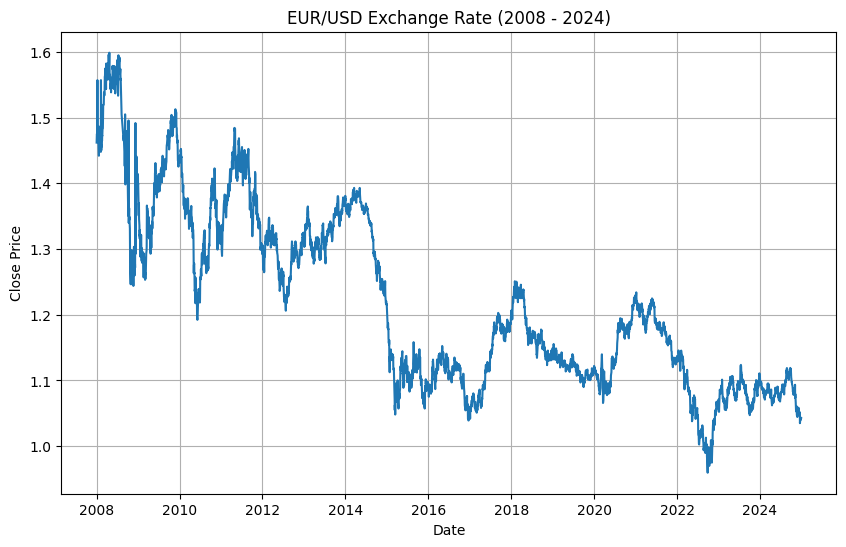

In [2]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
%matplotlib inline

# Time period
d1 = datetime.datetime(2008, 1, 1)
d2 = datetime.datetime(2024, 12, 31)

# Fetching data from Yahoo Finance
# 'EURUSD=X' is the correct ticker for EUR/USD exchange rate
data = yf.download('EURUSD=X', start=d1.strftime('%Y-%m-%d'), end=d2.strftime('%Y-%m-%d'))

# Displaying fetched data
display(data)

# Example of plotting closing prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title('EUR/USD Exchange Rate (2008 - 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


The plot you shared portrays the EUR/USD exchange rate over the period from 2008 to 2016. Here's a breakdown of what it represents:

Time Series (X-Axis): The x-axis represents the time frame, starting from January 2008 to December 2016.

Close Price (Y-Axis): The y-axis shows the closing prices of the EUR/USD exchange rate during this period.

Trends:

The chart captures fluctuations in the EUR/USD exchange rate.
A decreasing trend indicates that the Euro weakened against the US Dollar during certain periods.
An increasing trend indicates that the Euro gained strength against the US Dollar.
Key Observations:

The rate peaked above 1.6 in early 2008.
There was a significant downward trend around 2014-2016.
Smaller fluctuations occurred in between, reflecting economic or geopolitical events impacting the currency pair.

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume,aclose
Ticker,,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,
0,2008-01-01,1.462010,1.462994,1.458194,1.460110,0,0.68399
1,2008-01-02,1.471692,1.474296,1.460110,1.462309,0,0.67949
2,2008-01-03,1.474491,1.477891,1.469400,1.471692,0,0.67820
3,2008-01-04,1.475492,1.481811,1.469896,1.474709,0,0.67774
4,2008-01-07,1.468299,1.475209,1.466706,1.475209,0,0.68106


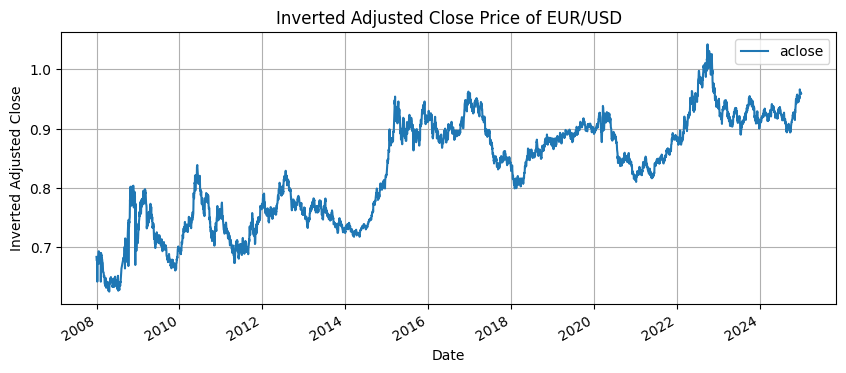

In [ ]:

# Fetching data from Yahoo Finance
data = yf.download('EURUSD=X', start=d1.strftime('%Y-%m-%d'), end=d2.strftime('%Y-%m-%d'))

# Put data into Pandas DataFrame
df = data.reset_index()  # Resetting the index to make 'Date' a column
df['aclose'] = 1.0 / df['Close']  # Invert adjusted close price for visualization

# Display the first few rows of the DataFrame
display(df.head())

# Plot the adjusted close prices
df.plot(x='Date', y='aclose', figsize=(10, 4))
plt.title('Inverted Adjusted Close Price of EUR/USD')
plt.xlabel('Date')
plt.ylabel('Inverted Adjusted Close')
plt.grid(True)
plt.show()


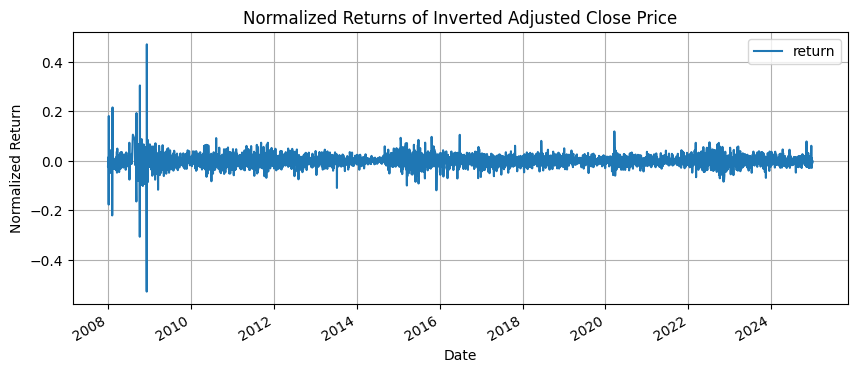

In [ ]:
# Calculate the daily return
df['return'] = df['aclose'] - df['aclose'].shift(1)

# Normalize the returns by dividing by the return range
return_range = df['return'].max() - df['return'].min()
df['return'] = df['return'] / return_range

# Plot the normalized returns
df.plot(x='Date', y='return', figsize=(10, 4))  # Use 'Date' (capitalized)
plt.title('Normalized Returns of Inverted Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.grid(True)
plt.show()


In [ ]:
# Make label, 1 as rising price, 0 as falling price

df['label'] = df['return'].shift(-1)
df['label'] = df['label'].apply(lambda x: 1 if x>0.0 else 0)
# df.dropna(inplace=True)
df.tail()

Price,Date,Close,High,Low,Open,Volume,aclose,return,label
Ticker,,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,,,
4406,2024-12-24,1.040583,1.041124,1.038745,1.040583,0,0.96100,0.011445,1
4407,2024-12-25,1.040258,1.043297,1.040150,1.040258,0,0.96130,0.001368,1
4408,2024-12-26,1.039955,1.042535,1.039145,1.039955,0,0.96158,0.001276,0
4409,2024-12-27,1.042318,1.044495,1.040669,1.042318,0,0.95940,-0.009939,0
4410,2024-12-30,1.042938,1.045850,1.037420,1.042938,0,0.95883,-0.002599,0


In [ ]:
# Make training dataset
n_features = 60  # Number of features

train_x = np.array([]).reshape([-1, n_features])
train_y = np.array([]).reshape([-1, 1])

for index, row in df.iterrows():
    i = df.index.get_loc(index)
    if i < n_features:
        continue

    # Select 'return' values for features
    _x = np.array(df.iloc[i - n_features + 1:i + 1]['return']).T.reshape([1, -1])

    # Replace .ix with .iloc for the label
    _y = df.iloc[i]['label']

    # Append to training dataset
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))

# Reshape train_y for compatibility
train_y = train_y.reshape([-1])

# Print dataset shapes and class distributions
print(train_x.shape)
print(train_y.shape)
print('%% of Class0 : %f' % (np.count_nonzero(train_y == 0) / float(len(train_y))))
print('%% of Class1 : %f' % (np.count_nonzero(train_y == 1) / float(len(train_y))))


(4351, 60)
(4351,)
% of Class0 : 0.498966
% of Class1 : 0.501034


In [ ]:
# Generate discrete labels (binary classification)
# Example: classify returns as 1 if positive, else 0
df['label'] = (df['return'] > 0).astype(int)

# Make sure `train_y` is correctly extracted from the `label` column
train_y = np.array(df.iloc[n_features:]['label'])  # Update this based on `n_features`

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=10000)

# Split dataset into training and testing sets
train_len = int(len(train_x) * 0.95)

# Train the model
clf.fit(train_x[:train_len], train_y[:train_len])

# Evaluate testing accuracy
accuracy = clf.score(train_x[train_len:], train_y[train_len:])
print('Testing Accuracy: %f' % accuracy)



Testing Accuracy: 1.000000


,return,label,pred,won,pnl,equity
212,0.00251,0,0,True,25.100267,5652.104735
213,0.00030,1,1,True,2.999850,5655.104586
214,0.00028,1,1,True,2.798905,5657.903491
215,-0.00218,1,1,True,21.799307,5679.702798
216,-0.00057,0,0,True,5.700169,5685.402966


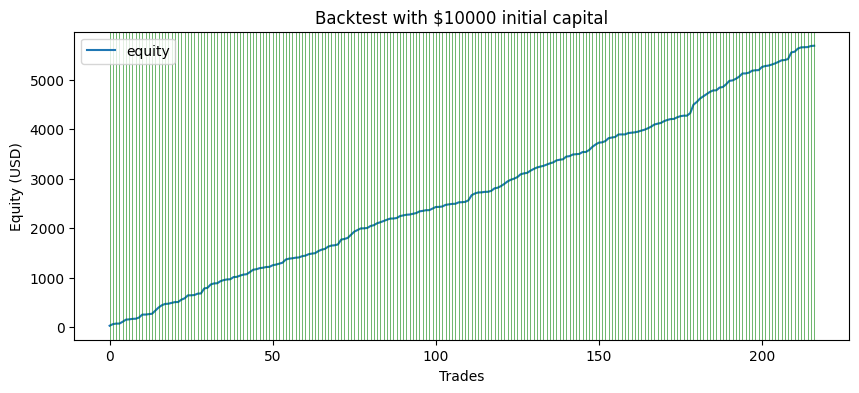

In [ ]:
# Predict test data

pred = clf.predict(train_x[train_len:])


# Calculate equity..

contracts  = 10000.0
commission = 0.0


df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['return'])
df_trade['label']  = train_y[train_len:]
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']
df_trade['return'] = df_trade['return'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

def calc_profit(row):
    if row['won']:
        return abs(row['return'])*contracts - commission
    else:
        return -abs(row['return'])*contracts - commission

df_trade['pnl'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['equity'] = df_trade['pnl'].cumsum()

display(df_trade.tail())
df_trade.plot(y='equity', figsize=(10,4), title='Backtest with $10000 initial capital')
plt.xlabel('Trades')
plt.ylabel('Equity (USD)')
for r in df_trade.iterrows():
    if r[1]['won']:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
    else:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')

Net Profit            : $5685.40
Number Winning Trades : 216
Number Losing Trades  : 0
Percent Profitable    : 100.00%
Avg Win Trade         : $26.321
Avg Los Trade         : $nan
Largest Win Trade     : $171.600
Largest Los Trade     : $nan
Profit Factor         : Infinity (No losing trades)


<Axes: >

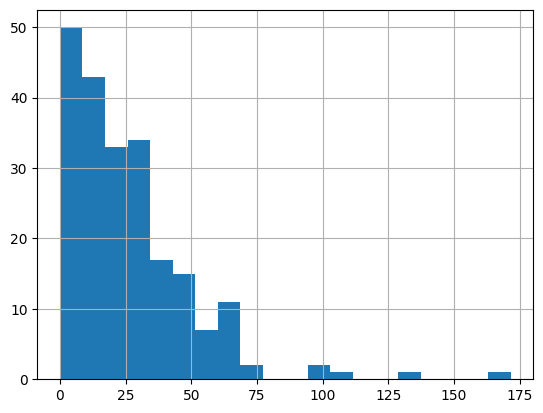

In [ ]:
# Calculate summary of trades

n_win_trades = float(df_trade[df_trade['pnl'] > 0.0]['pnl'].count())
n_los_trades = float(df_trade[df_trade['pnl'] < 0.0]['pnl'].count())

# Net Profit
print("Net Profit            : $%.2f" % float(df_trade.tail(1)['equity'].iloc[0]))

# Winning and Losing Trades
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)

# Percent Profitable
total_trades = n_win_trades + n_los_trades
if total_trades > 0:
    print("Percent Profitable    : %.2f%%" % (100 * n_win_trades / total_trades))
else:
    print("Percent Profitable    : N/A (No trades executed)")

# Average Winning and Losing Trades
print("Avg Win Trade         : $%.3f" % df_trade[df_trade['pnl'] > 0.0]['pnl'].mean())
print("Avg Los Trade         : $%.3f" % df_trade[df_trade['pnl'] < 0.0]['pnl'].mean())

# Largest Winning and Losing Trades
print("Largest Win Trade     : $%.3f" % df_trade[df_trade['pnl'] > 0.0]['pnl'].max())
print("Largest Los Trade     : $%.3f" % df_trade[df_trade['pnl'] < 0.0]['pnl'].min())

# Profit Factor
losing_sum = df_trade[df_trade['pnl'] < 0.0]['pnl'].sum()
if losing_sum == 0:
    print("Profit Factor         : Infinity (No losing trades)")
else:
    print("Profit Factor         : %.2f" % abs(df_trade[df_trade['pnl'] > 0.0]['pnl'].sum() / losing_sum))

# Plot PnL histogram
df_trade['pnl'].hist(bins=20)


Net Profit            : $5685.40
Number Winning Trades : 216
Number Losing Trades  : 0
Percent Profitable    : 100.00%
Avg Win Trade         : $26.321
Avg Los Trade         : $0.000
Largest Win Trade     : $171.600
Largest Los Trade     : $0.000
Profit Factor         : Infinity (No losing trades)


<Axes: >

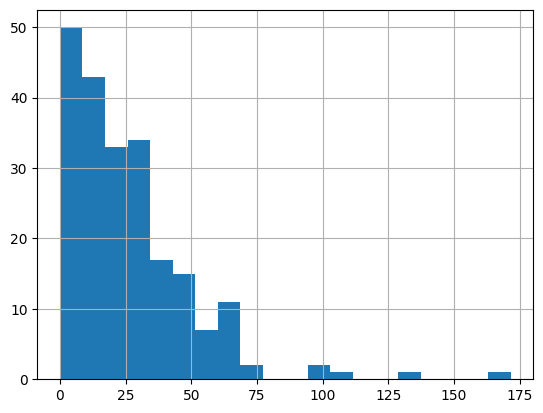

In [ ]:
# Calculate summary of trades

n_win_trades = float(df_trade[df_trade['pnl'] > 0.0]['pnl'].count())
n_los_trades = float(df_trade[df_trade['pnl'] < 0.0]['pnl'].count())

# Net Profit
print("Net Profit            : $%.2f" % float(df_trade.tail(1)['equity'].iloc[0]))

# Winning and Losing Trades
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)

# Percent Profitable
total_trades = n_win_trades + n_los_trades
if total_trades > 0:
    print("Percent Profitable    : %.2f%%" % (100 * n_win_trades / total_trades))
else:
    print("Percent Profitable    : N/A (No trades executed)")

# Average Winning and Losing Trades
avg_win_trade = df_trade[df_trade['pnl'] > 0.0]['pnl'].mean()
avg_los_trade = df_trade[df_trade['pnl'] < 0.0]['pnl'].mean()
print("Avg Win Trade         : $%.3f" % (avg_win_trade if not pd.isna(avg_win_trade) else 0.0))
print("Avg Los Trade         : $%.3f" % (avg_los_trade if not pd.isna(avg_los_trade) else 0.0))

# Largest Winning and Losing Trades
largest_win_trade = df_trade[df_trade['pnl'] > 0.0]['pnl'].max()
largest_los_trade = df_trade[df_trade['pnl'] < 0.0]['pnl'].min()
print("Largest Win Trade     : $%.3f" % (largest_win_trade if not pd.isna(largest_win_trade) else 0.0))
print("Largest Los Trade     : $%.3f" % (largest_los_trade if not pd.isna(largest_los_trade) else 0.0))

# Profit Factor
losing_sum = df_trade[df_trade['pnl'] < 0.0]['pnl'].sum()
if losing_sum == 0:
    print("Profit Factor         : Infinity (No losing trades)")
else:
    print("Profit Factor         : %.2f" % abs(df_trade[df_trade['pnl'] > 0.0]['pnl'].sum() / losing_sum))

# Plot PnL histogram
df_trade['pnl'].hist(bins=20)
